## Credits: Gabriel Onyedika Nnamoko
 TASK INSTRUCTIONS
 
 New Horizons is a new insurance company in Thunder Island, a country of about 2 hundred thousand people, located in the Atlantic Ocean. They have approached you as a notable data scientist to analyse some data so as to help them make some business decisions in this new market. 
 
 They want to gain a fair share of the island's insurance market by knowing how they can better render services to insurance customers, spread through four regions of the island. 
 
 They also have a "VIP Policy" they want to introduce that costs $20000 per annum. To whom, and in which of the regions, could selling this new insurance policy possibly record the highest success?
 
 You have been provided the data below to work with.
 
 Current Task: Listen to instructions. Visualize insurance holders distribution according to region.
 
 Follow me on:
 
 Twitter: https://twitter.com/gabriel_nnamoko
 
 Facebook: https://facebook.com/gabriel-nnamoko-3
 
 LinkedIn: https://www.linkedin.com/in/gabriel-onyedika-nnamoko-2bb4891a1/
 
 Github: https://github.com/TheRealGeeBee

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv(r"C:\Users\GABBY\Downloads\datasets combo\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


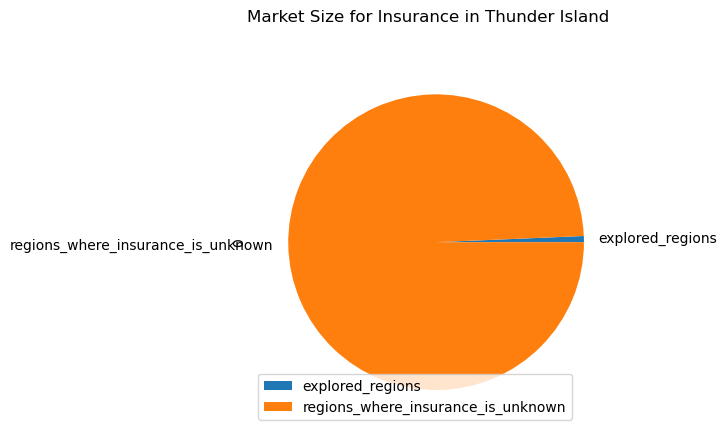

In [10]:
df.isnull().sum() #There are no null values present in the dataset

total_insured_population = df['age'].value_counts().sum()
total_insured_population

regions_total = df["region"].value_counts()
#regions_total
total_explored = regions_total.sum()
unexplored_population = 200000 - regions_total.sum() #Other population of the island that are not yet subscribed to any insurance policy

regions_list = [total_explored, unexplored_population]
regions_list = pd.DataFrame(regions_list, index=['explored_regions',  'regions_where_insurance_is_unknown'])
regions_list.plot(kind='pie', title='Market Size for Insurance in Thunder Island', subplots=True)
plt.savefig("Market Size for Insurance.png", bbox_inches='tight')
plt.show()


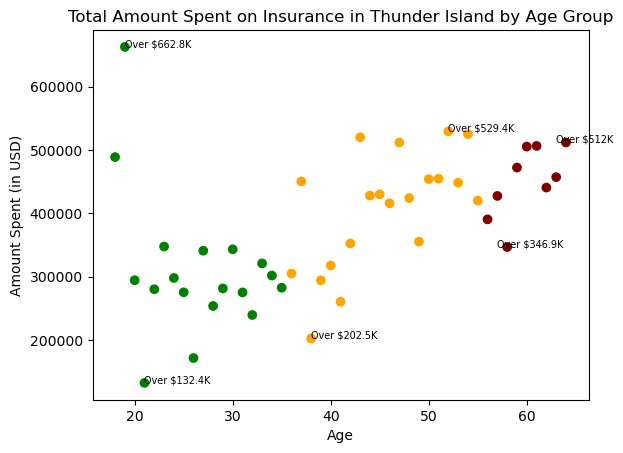

In [11]:
ages_spendings = []
ages = []
counter = 18
spendings = df.groupby('age')['charges'].sum()
for items in spendings:
    ages_spendings.append(round(items, 0))
while counter <= 64:
    ages.append(counter)
    counter+= 1

colour = []
for age in ages:
    if age <= 35:
        colour.append("green")
    elif age >35 and age < 56:
        colour.append("orange")
    elif age >= 56:
        colour.append("maroon")
    else:
        colour.append("black")

plt.scatter(x=ages, y=ages_spendings, c=colour)
plt.title("Total Amount Spent on Insurance in Thunder Island by Age Group")
plt.xlabel("Age")
plt.ylabel("Amount Spent (in USD)")
plt.text(19, 662858.0, "Over $662.8K", fontsize=7)
plt.text(21, 132453.0, "Over $132.4K", fontsize=7)
plt.text(38, 202568.0, "Over $202.5K", fontsize=7)
plt.text(52, 529432.0, "Over $529.4K", fontsize=7)
plt.text(57, 346973.0, "Over $346.9K", fontsize=7)
plt.text(63, 512062.0, "Over $512K", fontsize=7)
plt.savefig("Insurance Spending by Age Groups.png", bbox_inches='tight')
plt.show()

## We are getting interesting insurance spending habits (by age groups) from the scatter plot above.
Ages greater than 55 (far right, maroon) spend more on insurance than 89% of those aged 35 and lower (far left, green), and more than 20% of those aged 36 to 55 (middle, orange). 95% of those aged 36 to 55 spend more on insurance than 22% of those aged 35 and lower, 20% of them spend more than those aged 56 and higher. 5.6% of those aged 35 and lower spend more than any other age group.

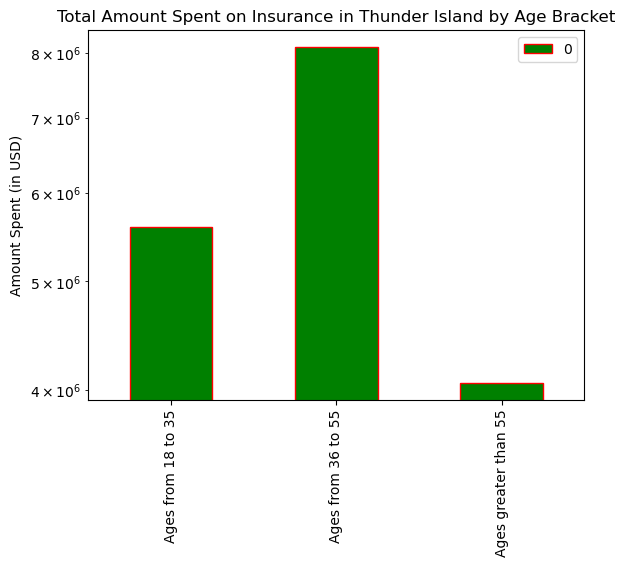

In [12]:
#Checking for the ages that spend the highest in insurance
age_less_than_36 = df[df['age'] <= 35] 
lower_age_bracket = age_less_than_36['charges'].sum() #This age bracket spent $5593330.533489 in insurance (approx. 31.5% of total insurance spendings)

adults_less_than_56 = df[(df['age'] >= 36) & (df['age'] <= 55)]
middle_age_bracket = adults_less_than_56['charges'].sum() #This age bracket spent $8102559.793060001 in insurance (approx. 45.63% of total insurance spendings)

adults_greater_than_55 = df[df['age'] >= 56]
upper_age_bracket = adults_greater_than_55['charges'].sum() #This age bracket spent $4059934.66421 in insurance (approx. 22.87% of total insurance spendings)

x_axis = [lower_age_bracket, middle_age_bracket, upper_age_bracket]
y_axis = ["Ages from 18 to 35", "Ages from 36 to 55", "Ages greater than 55"]
spending_df = pd.DataFrame(x_axis, index=y_axis)

spending_df.plot(kind='bar', color='green', edgecolor='red')
plt.yscale('log')
plt.ylabel("Amount Spent (in USD)")
plt.title("Total Amount Spent on Insurance in Thunder Island by Age Bracket")
plt.savefig("Total Insurance Spendings by Age Bracket.png", bbox_inches='tight')
plt.show()

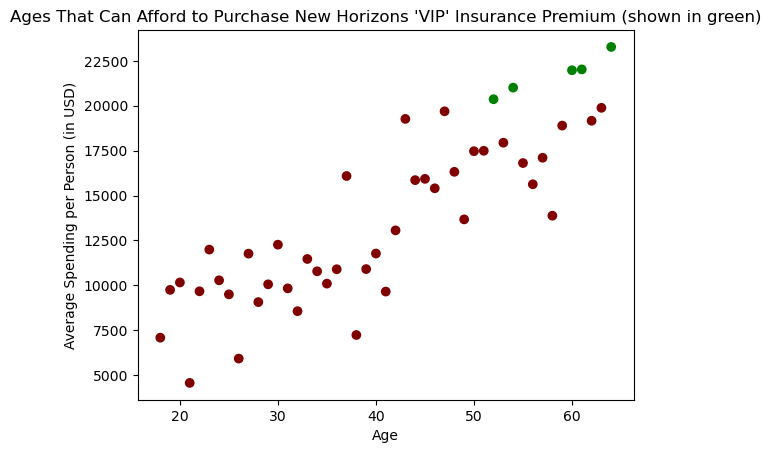

In [13]:
#This is used to get the total occurrence of each age group
age_counter =  df['age'].value_counts()
#age_counter = pd.DataFrame(age_counter, index=ages)
age_count_list = []
for item in age_counter:
    age_count_list.append(item)

average_spendings_by_age = []
counter = 0

while counter <= 46:
    average_spending = ages_spendings[counter]/age_count_list[counter]
    average_spendings_by_age.append(round(average_spending, 0))
    counter += 1
my_colour = []
for values in average_spendings_by_age:
    if values >= 20000:
        my_colour.append("green")
    else:
        my_colour.append("maroon")
plt.scatter(x=ages, y=average_spendings_by_age, c=my_colour)
plt.ylabel("Average Spending per Person (in USD)")
plt.xlabel("Age")
plt.title("Ages That Can Afford to Purchase New Horizons 'VIP' Insurance Premium (shown in green)")
plt.savefig("Average Individual Spending on Insurance.png", bbox_inches='tight')
plt.show()

## The scatter plot above is getting more interesting when compared with the one further above. 
When average individual spendings on insurance per group is taken, it can be seen that some age groups (shown in green) above 50 years (the exact ages are 52, 54, 61, 62, and 65) spend $20000 or above individually on insurance and, hence, are potential customers for the New Horizons new "VIP" insurance policy.

This age groups form around 9.34% of total insurance policy holders

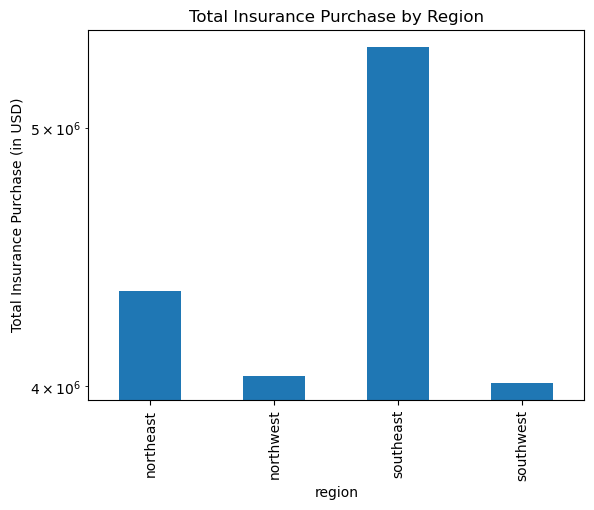

In [14]:
df.groupby("region")["charges"].sum().plot(kind='bar', ylabel="Total Insurance Purchase (in USD)", title="Total Insurance Purchase by Region")
plt.yscale('log')
plt.show()

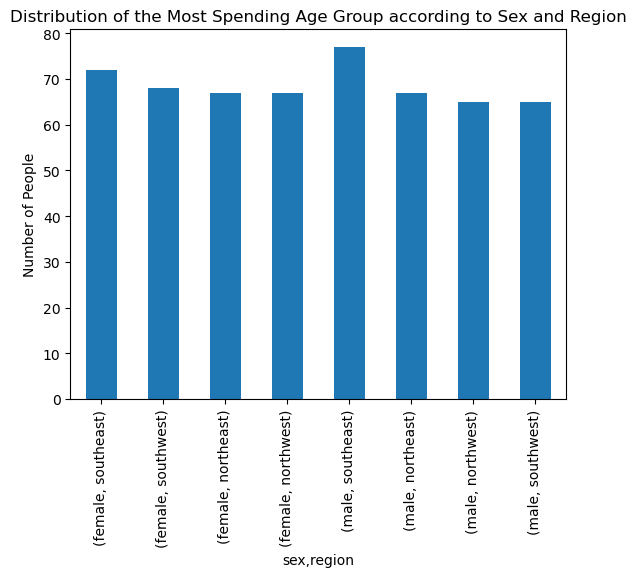

In [15]:
midage_df = df[(df['age'] > 35) & (df['age'] < 56)]
midage_df.groupby('sex')['region'].value_counts().plot(kind='bar', title='Distribution of the Most Spending Age Group according to Sex and Region')
plt.ylabel('Number of People')
#plt.legend(['male', 'female'])
plt.show()

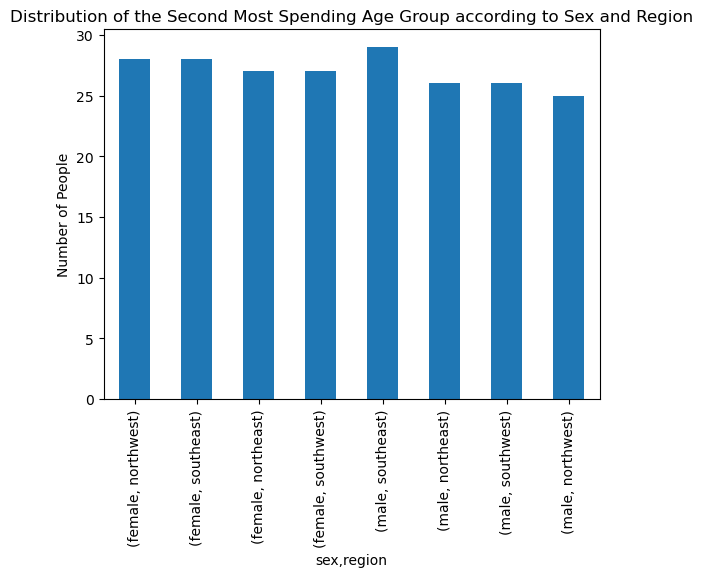

In [16]:
hiage_df = df[df['age'] > 55]
hiage_df.groupby('sex')['region'].value_counts().plot(kind='bar', title='Distribution of the Second Most Spending Age Group according to Sex and Region')
plt.ylabel('Number of People')
#plt.legend(['male', 'female'])
plt.show()

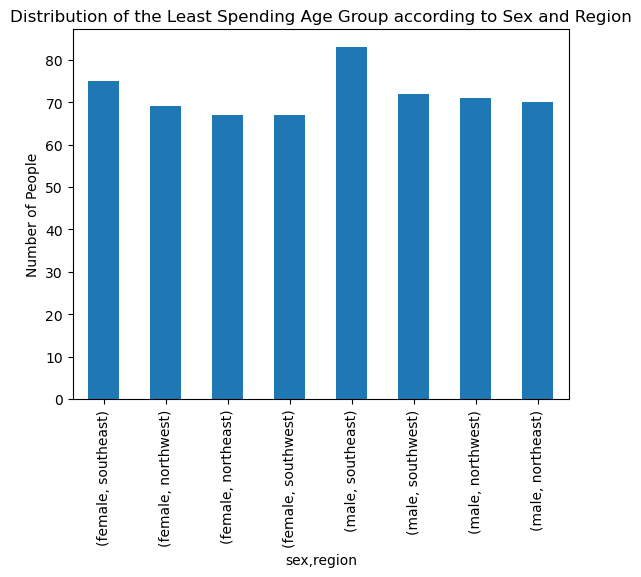

In [17]:
lowage_df = df[(df['age'] > 17) & (df['age'] < 36)]
lowage_df.groupby('sex')['region'].value_counts().plot(kind='bar', title='Distribution of the Least Spending Age Group according to Sex and Region')
plt.ylabel('Number of People')
#plt.legend(['male', 'female'])
plt.show()

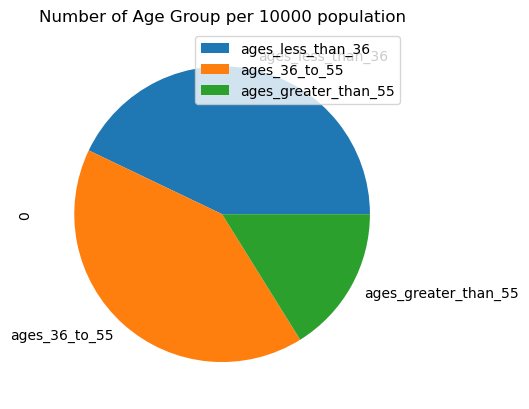

In [49]:
age_group_holder = []
age_1 = age_less_than_36['age'].value_counts().sum()
age_2 = adults_less_than_56['age'].value_counts().sum()
age_3 = adults_greater_than_55['age'].value_counts().sum()

island_population = 200000

age_1_percentage = (age_1*10000)/island_population
age_2_percentage = (age_2*10000)/island_population
age_3_percentage = (age_3*10000)/island_population
#remainder_population = ((10000 - (age_1+age_2+age_3))*10000)/island_population

age_group_holder = [age_1_percentage, age_2_percentage, age_3_percentage]

age_group_holder = pd.DataFrame(age_group_holder, index=['ages_less_than_36', "ages_36_to_55", "ages_greater_than_55"])

age_group_holder.plot(kind='pie', subplots=True)
plt.title("Number of Age Group per 10000 population")
plt.show()

## Notes from the pie chart above
Approximately 29 in 10000 of the population of Thunder Island is aged 18 to 35, approximately 27 is aged 36 to 55, while approximately 11 is aged over 55.

## Final Notes
I believe super customer service would be key, especially for the older age groups who spend higher amounts, per individual, on insurance. The insights gotten from the dataset have been presented above.

The business managers should also ensure that more research be carried on the population of Thunder Island to gain more insight on individual age groups, more especially on the unexplored markets, those who were not captured by the present dataset.